# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_ride = ((pyber_data_df.groupby(["type"]).sum()["fare"]) / (pyber_data_df.groupby(["type"]).count()["ride_id"]))

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = ((pyber_data_df.groupby(["type"]).sum()["fare"]) / (city_data_df.groupby(["type"]).sum()["driver_count"]))

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
             "Total Rides": total_rides,
             "Total Drivers": total_drivers,
             "Total Fares": total_fares,
             "Average Fare per Ride": average_fare_ride,
             "Average Fare per Driver": average_fare_driver})

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# Importing additional dependencies
import datetime as dt
# Converting 'date' column to datetime format
pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'])

In [12]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date.
Total_Fare_Date = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
Total_Fare_Date

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
Total_Fare_Date = Total_Fare_Date.reset_index()

In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
Total_Fare_Date_Pivot = Total_Fare_Date.pivot(index="date", columns="type", values="fare")
Total_Fare_Date_Pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
Date_Type_Fare = Total_Fare_Date_Pivot.loc['2019-1-1':'2019-4-29']
Date_Type_Fare

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
Date_Type_Fare.index = pd.to_datetime(Date_Type_Fare.index)

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
Date_Type_Fare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Date_Type_Fare_Week = Date_Type_Fare.resample("W").sum()
Date_Type_Fare_Week.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [20]:
# Establishing series for axis plotting
D_Urban = Date_Type_Fare_Week.Urban
D_Suburban = Date_Type_Fare_Week.Suburban
D_Rural = Date_Type_Fare_Week.Rural
D_Date = Date_Type_Fare_Week.index

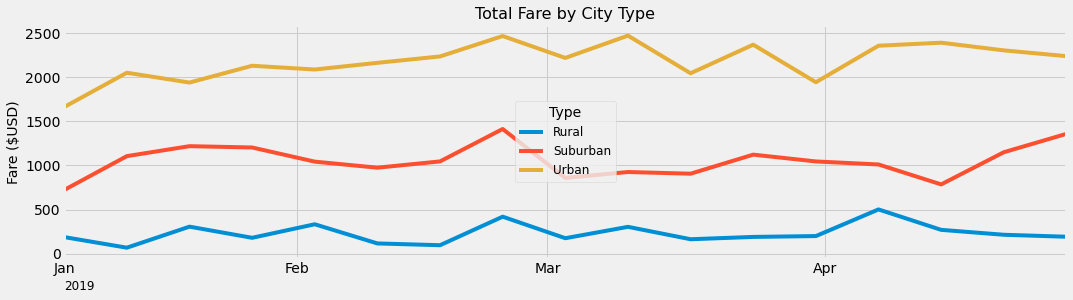

In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')
# Generate line graphs using object-oriented method
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(D_Date, D_Rural, label='Rural')
ax.plot(D_Date, D_Suburban, label='Suburban')
ax.plot(D_Date, D_Urban, label='Urban')
# X-axis formatting
ax.set_xlim(['2019-01-06'], ['2019-04-28'])
ax.set_xticks(['2019-01-06', '2019-02-01', '2019-03-01', '2019-04-01'], labels=['Jan', 'Feb', 'Mar', 'Apr'])
ax.set_xlabel('2019', fontsize=12, loc='left')
# Add the Legend
ax.legend(fontsize="12", loc='center', title='Type')
# Add the grid
plt.grid(True)
# Label y-axis
ax.yaxis.set_label_text('Fare ($USD)', fontsize=14)
# Set title
ax.set_title('Total Fare by City Type', fontsize=16)
# Save the figure as a png
plt.savefig("Analysis/PyBer_fare_summary.png")
# Display the graph
plt.show()